# MNIST Data Set - Basic Approach

### Get the MNIST Data

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np
path="MNIST_data/mnist.npz"
with np.load(path, allow_pickle=True) as f:
    print(type(f))
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

<class 'numpy.lib.npyio.NpzFile'>


In [3]:
a = 1
b = 2
print(a,b)

1 2


In [4]:
a, b = 1,2
print(a)
print(b)

1
2


In [5]:
c = 1,2

In [6]:
c

(1, 2)

In [7]:
type(c)

tuple

** Alternative sources of the data just in case: **

https://s3.amazonaws.com/img-datasets/mnist.npz

In [8]:
type(x_train)

numpy.ndarray

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
len(x_train)

60000

In [11]:
len(x_test)

10000

### Visualizing the Data

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
x_train[1].shape

(28, 28)

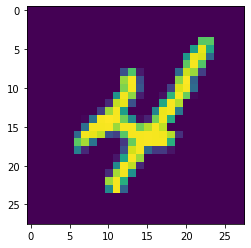

In [17]:
plt.imshow(x_train[9])

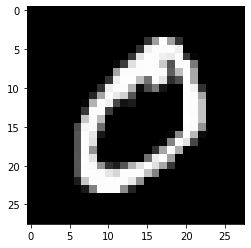

In [18]:
plt.imshow(x_train[1],cmap='gist_gray')

In [19]:
x_train[1].max()


255

In [20]:
x_train[1].min()

0

In [21]:
28*28


784

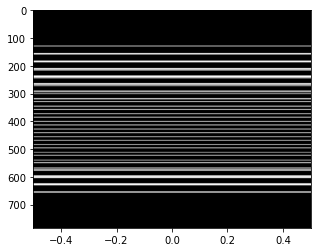

In [25]:
plt.imshow(x_train[1].reshape(784,1),
           cmap='gist_gray',
           aspect=0.001);

## Create the Model

In [26]:
x = tf.placeholder(tf.float32,shape=[None,784])

In [27]:
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))

In [28]:
b = tf.Variable(tf.zeros([10]))

In [30]:
# Create the Graph
y = tf.matmul(x,W) + b 

Loss and Optimizer

In [31]:
# 2 [0,0,1,0,0,0,0,0,0,0] one hot
y_true = tf.placeholder(tf.float32,[None,10])

In [ ]:
# Cross Entropy

In [ ]:
# y_true:                     2 [0,0,1,0,0,0,0,0,0,0]
# y = tf.matmul(x,W) + b  :   2 [0.06,0.04,0.6,0.03,0.07,0.05,0.05,0.05,0.05,0]

In [32]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_true, 
                                            logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [33]:
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.5)

In [34]:
train = optimizer.minimize(cross_entropy)

In [35]:
x_train[0:10].shape

(10, 28, 28)

In [36]:
x_train[0:10].reshape(10,784)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [37]:
x_train[0:10].reshape(10,784)[2].sum()

19443

In [38]:
x_train[0:10][2].sum()

19443

In [39]:
y_train.shape

(60000,)

In [40]:
y_train[0]

5

In [41]:
y_train.max()

9

In [42]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [44]:
np.eye(10)[5]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [45]:
np.eye(10)[[5,2,3]]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [47]:
def one_hot(arr,num_c=10):
     return np.eye(num_c)[arr]

In [48]:
a = np.array([1,3,4,6,9])

one_hot(a,num_c=10)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [49]:
len(x_train)

60000

In [50]:
last_batch_id = 0
def next_batch(batch_size=100):
    
    global last_batch_id
    
    x_batch = x_train[last_batch_id:last_batch_id+batch_size]
    y_batch = y_train[last_batch_id:last_batch_id+batch_size]
    if last_batch_id + batch_size < len(x_train):
        last_batch_id +=batch_size 
    else:
        last_batch_id = 0
    return x_batch.reshape(-1,784), one_hot(y_batch)

In [51]:
a = np.zeros((10,10))
a.shape

(10, 10)

In [52]:
b = a.reshape(-1,50)

In [53]:
b.shape

(2, 50)

In [54]:
a.reshape(2,-1,5).shape

(2, 10, 5)

In [66]:
next_batch(batch_size=10)
print(last_batch_id)

39


In [67]:
last_batch_id = 0

### Create Session

In [68]:
init = tf.global_variables_initializer()

In [70]:
last_batch_id = 0

with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    # Using built in batch feeder from mnist for convenience
    
    for step in range(1000):
        
        batch_x , batch_y = next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    print(sess.run(matches,feed_dict={x:x_test.reshape(
        (-1,784)),
                                  y_true:one_hot(y_test)}))
    print(sess.run(tf.cast(matches,tf.int8),
                   feed_dict={x:x_test.reshape(
        (-1,784)),
                                  y_true:one_hot(y_test)}))
    print(sess.run(tf.cast(matches,tf.float32),
                   feed_dict={x:x_test.reshape(
        (-1,784)),
                                  y_true:one_hot(y_test)}))
    acc = tf.reduce_mean(tf.cast(matches,tf.int8))
    print(acc.dtype)
    print(sess.run(acc,feed_dict={x:x_test.reshape((-1,784)),
                                  y_true:one_hot(y_test)}))
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    print(acc.dtype)
    print(sess.run(acc,feed_dict={x:x_test.reshape((-1,784)),
                                  y_true:one_hot(y_test)}))

[ True  True  True ...  True  True  True]
[1 1 1 ... 1 1 1]
[1. 1. 1. ... 1. 1. 1.]
<dtype: 'int8'>
0
<dtype: 'float32'>
0.8737


While this may seem pretty good, we can actually do much better, the best models can get above 99% accuracy.

How do they do this? By using other models, such as convolutional neural networks!